In [ ]:
!git clone https://github.com/PakO0044/Finals_OpenCV_MEXE4102_Neil_Evan_S._Ramirez_-_John_Lloyd_J._Talban.git
%cd Finals_OpenCV_MEXE4102_Neil_Evan_S._Ramirez_-_John_Lloyd_J._Talban
from IPython.display import clear_output
clear_output()



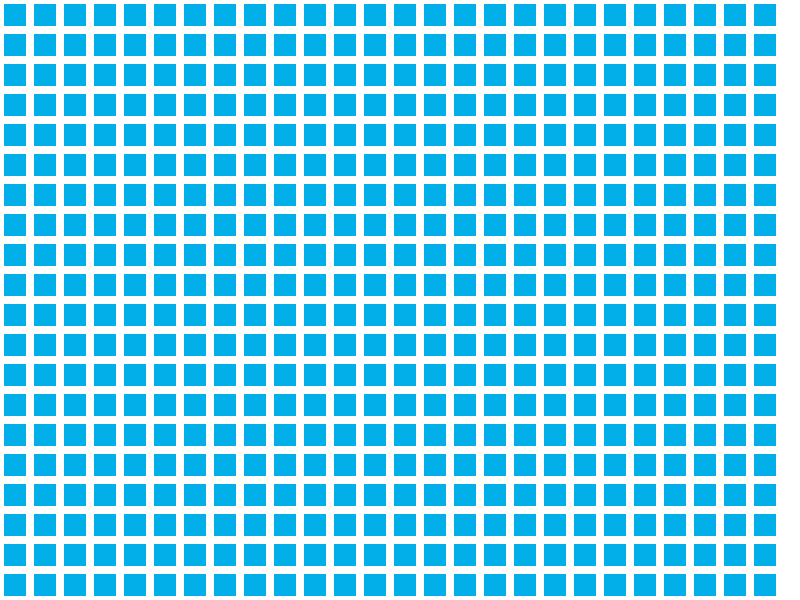

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the uploaded image for square (update the path to your dataset in Colab environment)
square = cv2.imread("Dataset/square.png", cv2.IMREAD_UNCHANGED)

# Function to remove the background by making it transparent
def remove_background(image):
    if image is None:
        raise ValueError("Image not found. Please check the file path.")
    if image.shape[2] == 4:  # If the image already has an alpha channel
        return image
    else:
        # Create an alpha channel (transparency) for the image
        b, g, r = cv2.split(image)
        alpha_channel = np.ones_like(b) * 255
        lower = np.array([240, 240, 240])  # White background range
        upper = np.array([255, 255, 255])
        mask = cv2.inRange(image, lower, upper)
        alpha_channel[mask == 255] = 0  # Make the background transparent
        return cv2.merge((b, g, r, alpha_channel))

# Remove the background from the square image
try:
    square = remove_background(square)
except ValueError as e:
    print(e)

# Resize the square image for uniform tessellation
shape_size = 30  # Fixed size for each shape
square = cv2.resize(square, (shape_size, shape_size))

# Canvas dimensions
width, height = 800, 600
canvas = np.ones((height, width, 3), dtype=np.uint8) * 255  # White canvas

# Function to overlay an image with transparency
def overlay_image(background, overlay, x, y):
    h, w = overlay.shape[:2]
    if overlay.shape[2] == 4:  # If the overlay has an alpha channel
        alpha_channel = overlay[:, :, 3] / 255.0
        for c in range(3):  # Blend each color channel
            background[y:y+h, x:x+w, c] = (
                alpha_channel * overlay[:, :, c] +
                (1 - alpha_channel) * background[y:y+h, x:x+w, c]
            )

# Tessellation parameters
rows, cols = height // shape_size, width // shape_size

# Create tessellation by placing only squares
for i in range(rows):
    for j in range(cols):
        x, y = j * shape_size, i * shape_size
        overlay_image(canvas, square, x, y)

# Display the tessellation
cv2_imshow(canvas)  # Use cv2_imshow for displaying in Colab
cv2.imwrite("square_tessellation.png", canvas)  # Optionally save the output for download


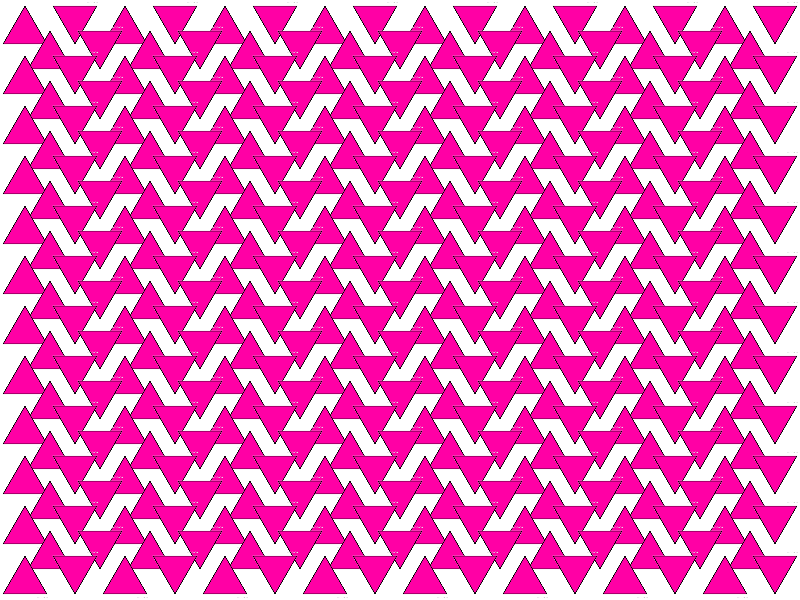

True

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the triangle image (update the path for Colab)
triangle = cv2.imread("Dataset/triangle.png", cv2.IMREAD_UNCHANGED)

# Function to remove the background by making it transparent
def remove_background(image):
    if image is None:
        raise ValueError("Image not found. Please check the file path.")
    if image.shape[2] == 4:  # If the image already has an alpha channel
        return image
    else:
        # Create an alpha channel (transparency) for the image
        b, g, r = cv2.split(image)
        alpha_channel = np.ones_like(b) * 255
        lower = np.array([240, 240, 240])  # White background range
        upper = np.array([255, 255, 255])
        mask = cv2.inRange(image, lower, upper)
        alpha_channel[mask == 255] = 0  # Make the background transparent
        return cv2.merge((b, g, r, alpha_channel))

# Remove background from the triangle image
try:
    triangle = remove_background(triangle)
except ValueError as e:
    print(e)

# Resize the triangle for uniform tessellation
shape_size = 50  # Triangle's side length
triangle = cv2.resize(triangle, (shape_size, shape_size))

# Create a flipped version of the triangle
triangle_flipped = cv2.flip(triangle, 0)

# Canvas dimensions
width, height = 800, 600
canvas = np.ones((height, width, 3), dtype=np.uint8) * 255  # White canvas

# Function to overlay an image with transparency
def overlay_image(background, overlay, x, y):
    h, w = overlay.shape[:2]
    # Ensure the overlay fits within the canvas
    if y + h > background.shape[0] or x + w > background.shape[1]:
        return  # Skip if the overlay exceeds the canvas boundaries
    alpha_channel = overlay[:, :, 3] / 255.0  # Alpha transparency
    for c in range(3):  # Blend each color channel
        background[y:y+h, x:x+w, c] = (
            alpha_channel * overlay[:, :, c] +
            (1 - alpha_channel) * background[y:y+h, x:x+w, c]
        )

# Tessellation parameters
row_height = shape_size // 2  # Row spacing (half triangle height)
cols = width // shape_size

# Create tessellation with alternating triangles
for i in range(height // row_height):
    for j in range(cols):
        x = j * shape_size
        y = i * row_height
        # Offset every second row to create the tessellation
        if i % 2 == 0:
            overlay_image(canvas, triangle if j % 2 == 0 else triangle_flipped, x, y)
        else:
            offset_x = shape_size // 2  # Shift odd rows
            overlay_image(canvas, triangle if j % 2 == 0 else triangle_flipped, x + offset_x, y)

# Display the tessellation
cv2_imshow(canvas)  # Use cv2_imshow for displaying in Colab
cv2.imwrite("triangle_tessellation.png", canvas)  # Optionally save the output for download


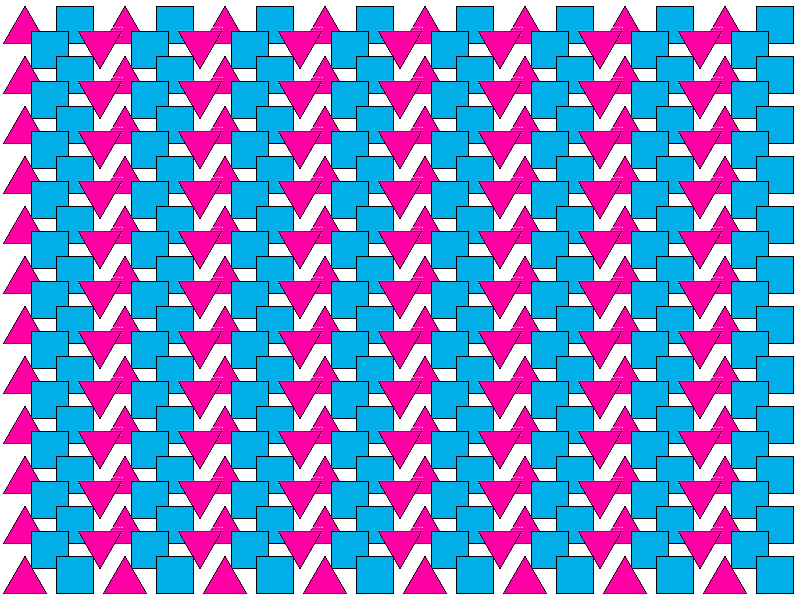

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the images
triangle = cv2.imread("Dataset/triangle.png", cv2.IMREAD_UNCHANGED)
square = cv2.imread("Dataset/square.png", cv2.IMREAD_UNCHANGED)

# Function to remove the background by making it transparent
def remove_background(image):
    if image is None:
        raise ValueError("Image not found. Please check the file path.")
    if image.shape[2] == 4:
        return image
    else:
        b, g, r = cv2.split(image)
        alpha_channel = np.ones_like(b) * 255
        lower = np.array([240, 240, 240])  # White background range
        upper = np.array([255, 255, 255])
        mask = cv2.inRange(image, lower, upper)
        alpha_channel[mask == 255] = 0
        return cv2.merge((b, g, r, alpha_channel))

# Remove backgrounds from the images
try:
    triangle = remove_background(triangle)
    square = remove_background(square)
except ValueError as e:
    print(e)

# Resize the shapes for uniform tessellation
shape_size = 50  # Size for the shapes
triangle = cv2.resize(triangle, (shape_size, shape_size))
square = cv2.resize(square, (shape_size, shape_size))

# Create a flipped version of the triangle
triangle_flipped = cv2.flip(triangle, 0)

# Canvas dimensions
width, height = 800, 600
canvas = np.ones((height, width, 3), dtype=np.uint8) * 255  # White canvas

# Function to overlay an image with transparency
def overlay_image(background, overlay, x, y):
    h, w = overlay.shape[:2]
    if y + h > background.shape[0] or x + w > background.shape[1]:
        return  # Skip if the overlay exceeds the canvas boundaries
    alpha_channel = overlay[:, :, 3] / 255.0  # Alpha transparency
    for c in range(3):  # Blend each color channel
        background[y:y+h, x:x+w, c] = (
            alpha_channel * overlay[:, :, c] +
            (1 - alpha_channel) * background[y:y+h, x:x+w, c]
        )

# Tessellation parameters
row_height = shape_size // 2  # Row spacing (half triangle height)
cols = width // shape_size

# Create tessellation with alternating shapes
for i in range(height // row_height):
    for j in range(cols):
        x = j * shape_size
        y = i * row_height
        if i % 2 == 0:  # Even rows
            if j % 2 == 0:
                overlay_image(canvas, triangle, x, y)
            else:
                overlay_image(canvas, square, x, y)
        else:  # Odd rows
            offset_x = shape_size // 2  # Shift odd rows
            if j % 2 == 0:
                overlay_image(canvas, square, x + offset_x, y)
            else:
                overlay_image(canvas, triangle_flipped, x + offset_x, y)

# Display the tessellation
cv2_imshow(canvas)  # Use cv2_imshow for displaying in Colab
cv2.imwrite("triangle_square_tessellation.png", canvas)  # Optionally save the output


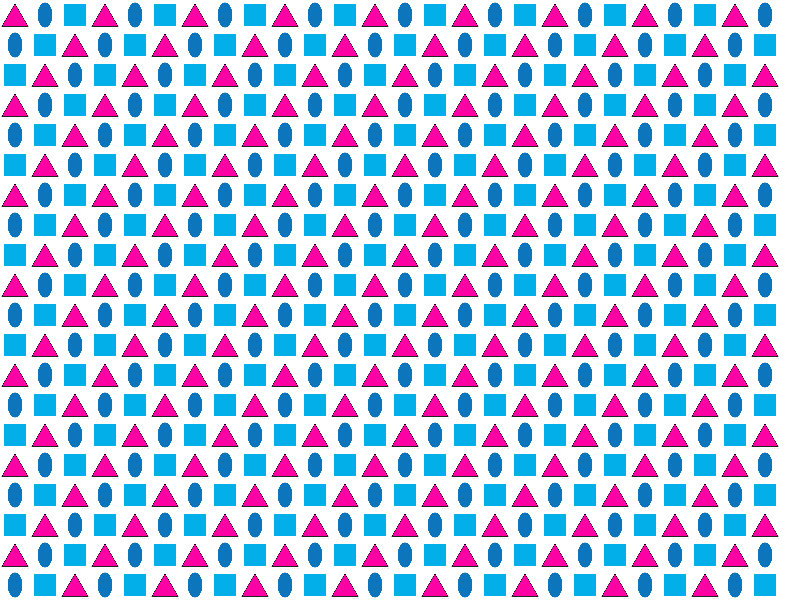

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the uploaded images
triangle = cv2.imread("Dataset/triangle.png", cv2.IMREAD_UNCHANGED)
circle = cv2.imread("Dataset/circle.png", cv2.IMREAD_UNCHANGED)
square = cv2.imread("Dataset/square.png", cv2.IMREAD_UNCHANGED)

# Function to remove the background by making it transparent
def remove_background(image):
    if image is None:
        raise ValueError("Image could not be loaded. Check the file path.")
    if image.shape[2] == 4:  # Already has an alpha channel
        return image
    else:
        # Create an alpha channel for the image
        b, g, r = cv2.split(image)
        alpha_channel = np.ones_like(b) * 255
        # Define background color range (white background assumed)
        lower = np.array([240, 240, 240])
        upper = np.array([255, 255, 255])
        mask = cv2.inRange(image, lower, upper)
        alpha_channel[mask == 255] = 0  # Set transparent for the background
        return cv2.merge((b, g, r, alpha_channel))

# Remove the background from the images
try:
    triangle = remove_background(triangle)
    circle = remove_background(circle)
    square = remove_background(square)
except ValueError as e:
    print(e)

# Resize the images for uniformity in tessellation
shape_size = 30  # Fixed size for each shape
triangle = cv2.resize(triangle, (shape_size, shape_size))
circle = cv2.resize(circle, (shape_size, shape_size))
square = cv2.resize(square, (shape_size, shape_size))

# Canvas dimensions
width, height = 800, 600
canvas = np.ones((height, width, 3), dtype=np.uint8) * 255  # White canvas

# Function to overlay an image with transparency
def overlay_image(background, overlay, x, y):
    h, w = overlay.shape[:2]
    if overlay.shape[2] == 4:  # If the overlay has an alpha channel
        alpha_channel = overlay[:, :, 3] / 255.0
        for c in range(3):
            background[y:y+h, x:x+w, c] = (
                alpha_channel * overlay[:, :, c] +
                (1 - alpha_channel) * background[y:y+h, x:x+w, c]
            )
    else:
        background[y:y+h, x:x+w] = overlay

# Tessellation parameters
rows, cols = height // shape_size, width // shape_size

# Create tessellation by alternating shapes
for i in range(rows):
    for j in range(cols):
        x, y = j * shape_size, i * shape_size
        if (i + j) % 3 == 0:
            overlay_image(canvas, triangle, x, y)
        elif (i + j) % 3 == 1:
            overlay_image(canvas, circle, x, y)
        else:
            overlay_image(canvas, square, x, y)

# Display the tessellation
cv2_imshow(canvas)  # Use cv2_imshow to display the image in Colab
cv2.imwrite("tessellation_output.png", canvas)  # Optionally save the output
